<a href="https://colab.research.google.com/github/moktan456/Data-Mining/blob/main/Answers_03_DataSimilarityDistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 03 Data Similarity and Distance
In this pract we will be exploring the concepts of data similarity and data distance.

As usual we will be using Jupyter Notebooks, Google Collab, and Python/Pandas. The data for this week can be found on [GitHub](https://github.com/PaulHancock/COMP5009_pracs).

# Q3 from Chapter 3 of [Aggarwal](https://www.springer.com/gp/book/9783319141411)

We will be working with the [*Ionosphere*](http://archive.ics.uci.edu/ml/datasets/Ionosphere) data set from the UCI Machine Learning Repository.

1. Copy the file `ionosphere.data` into the collaboratory space.
  - Review the file `ionosphere.names` if you want some context for the data
2. Compute the $L_p$ distances between all pairs of the first 10 data points, for p = 1, 2, and $\infty$
3. Compute the contrast measure on the data set for each norm.
  - Repeat the exercise after samling the first $r$ dimensions, where $r$ varies from 1 to the full dimensionality of the data.
  - Make a plot of contrast vs $r$, compare to figure 3.1 (a) of Aggarwal.

## 1. Copy the file `ionosphere.data` into the collaboratory space.
We want to be able to inspect the files before loading them so we'll download them into a local directory first.
To do this we need to use the `urllib` module.

Despite the name of the file (`ionosphere.data`) the format is `.csv` so save the file with the appropriate extension.

In [ ]:
import urllib
import urllib.request

In [ ]:
data_url = 'https://raw.githubusercontent.com/PaulHancock/COMP5009_pracs/main/data/ionosphere.csv'
file_name = 'ionosphere.csv'
urllib.request.urlretrieve(data_url, file_name)
# now do the same for the ionosphere.names file (at the same location)
data_url2 = 'https://raw.githubusercontent.com/PaulHancock/COMP5009_pracs/main/data/ionosphere.names'
file_name2 = "ionosphere.names"
urllib.request.urlretrieve(data_url2, file_name2)

('ionosphere.names', <http.client.HTTPMessage at 0x7fe5f7138690>)

Once you have copied the files using the above code, navigate to them and have  a quick look at the raw data and the description file.

## 2 Compute $L_p$ distances
Compute the $L_p$ distances between all pairs of the first 10 data points, for p = 1, 2, and $\infty$.

Note: As per `ionosphere.names` the final attribute is a class attribute either 'g', or 'b'.
We don't want to include non-numeric data when computing the $L_p$ norms, so we must drop this attribute.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
all_data = pd.read_csv('ionosphere.csv',
                       header=None) # this csv file has no header
all_data.head()

In [ ]:
# drop the colum with label 34
df = all_data.drop(columns=34)

In [ ]:
# view just one row
# we can't use df[0] since that will default to a column index not a row index
# instead we use the integer locator `iloc` which we can index as if it were a numpy array
# so df.iloc[0] is the first row
# df.iloc[0:5,0] would be the first 5 rows, but just the first column
df.iloc[0]

0     1.00000
1     0.00000
2     0.99539
3    -0.05889
4     0.85243
5     0.02306
6     0.83398
7    -0.37708
8     1.00000
9     0.03760
10    0.85243
11   -0.17755
12    0.59755
13   -0.44945
14    0.60536
15   -0.38223
16    0.84356
17   -0.38542
18    0.58212
19   -0.32192
20    0.56971
21   -0.29674
22    0.36946
23   -0.47357
24    0.56811
25   -0.51171
26    0.41078
27   -0.46168
28    0.21266
29   -0.34090
30    0.42267
31   -0.54487
32    0.18641
33   -0.45300
Name: 0, dtype: float64

In [ ]:
# note that the above shows both the row values and the row indexes
# if we want just the values we have to use `.values`
df.iloc[0].values

array([ 1.     ,  0.     ,  0.99539, -0.05889,  0.85243,  0.02306,
        0.83398, -0.37708,  1.     ,  0.0376 ,  0.85243, -0.17755,
        0.59755, -0.44945,  0.60536, -0.38223,  0.84356, -0.38542,
        0.58212, -0.32192,  0.56971, -0.29674,  0.36946, -0.47357,
        0.56811, -0.51171,  0.41078, -0.46168,  0.21266, -0.3409 ,
        0.42267, -0.54487,  0.18641, -0.453  ])

In [ ]:
# lets write separate functions for each of the lp norms
def l1(first_row, second_row):
  """
  Compute the $L_1$ distance between two rows of data
  L1(x,y) = Σ_i | x_i-y_i |
  """
  dist = np.sum(np.abs(first_row - second_row))
  return dist

def l2(first_row, second_row):
  """
  Compute the $L_2$ distance between two rows of data
  L2(x,y) = √(Σ_i | x_i-y_i |^2)
  """
  dist = np.sqrt(np.sum(np.abs(first_row - second_row)**2))
  return dist

def linf(first_row, second_row):
  """
  Compute the $L_\infty$ distance between two rows of data
  Linf(x,y) = max(|x-y|)
  """
  dist = np.max(np.abs(first_row - second_row))
  return dist

In [ ]:
# # test that our function(s) work on the first two rows, using all three norms
# We expect that Linf <= L2 <= L1
print(f"L1 = {l1(df.iloc[0], df.iloc[1])}")
print(f"L2 = {l2(df.iloc[0], df.iloc[1])}")
print(f"Linf = {linf(df.iloc[0], df.iloc[1])}")

L1 = 13.080950000000001
L2 = 2.7763589251571923
Linf = 1.12221


We now have functions which will compute L for p=1,2,$\infty$, so we must set up a list of all the combinations of the first 10 rows. `itertools` has a function exactly for this: `combinations`.

In [ ]:
# Generate all pairs of rows from the first 10
from itertools import combinations

In [ ]:
# accessing the first 10 rows we use df.iloc[:10]
# our functions want to work on lists of values so we chain the above with .values

pairs = combinations(df.iloc[:10].values, # the items from which we are sampling
                     2)                   # the number of samples to take at a time
lp1_dist = []
lp2_dist = []
lpinf_dist = []
for r1, r2 in pairs:
  lp1_dist.append(l1(r1,r2))
  lp2_dist.append(l2(r1,r2))
  lpinf_dist.append(linf(r1,r2))


In [ ]:
# Summarise our data
print(f"Mean of $L_1$ over first 10 rows: {np.mean(lp1_dist):.2f}")
print(f"Mean of $L_2$ over first 10 rows: {np.mean(lp2_dist):.2f}")
print(f"Mean of $L_\infty$ over first 10 rows: {np.mean(lpinf_dist):.2f}")

Mean of $L_1$ over first 10 rows: 15.58
Mean of $L_2$ over first 10 rows: 3.40
Mean of $L_\infty$ over first 10 rows: 1.20


In [ ]:
# check that we have always positive values
lp1_dist

[13.080950000000001,
 5.359709999999999,
 21.057290000000002,
 6.21387,
 15.166310000000001,
 7.577039999999999,
 22.28699,
 5.81361,
 17.20169,
 15.80038,
 20.7696,
 11.52616,
 12.58796,
 12.281089999999999,
 22.639000000000003,
 16.54506,
 14.54198,
 20.30478,
 8.50424,
 14.248440000000002,
 11.57535,
 21.16584,
 7.8223,
 16.08502,
 20.752180000000003,
 17.81826,
 24.996350000000003,
 15.736959999999998,
 25.08336,
 19.094820000000002,
 11.782660000000002,
 6.42595,
 22.27638,
 9.060740000000001,
 14.0794,
 17.612230000000004,
 15.668239999999999,
 20.152,
 5.57928,
 26.06633,
 6.564169999999999,
 19.53089,
 25.007680000000004,
 16.48354,
 21.27012]

## 3 Compute the contrast measure
Compute the contrast measure on the data set for each norm.
  - Repeat the exercise after samling the first $r$ dimensions, where $r$ varies from 1 to the full dimensionality of the data.
  - Make a plot of contrast vs $r$, compare to figure 3.1 (a) of Aggarwal.



Recall that the contrast measure is given by

$Contrast(D) = \frac{D_{max} - D_{min}}{\mu}$


In [ ]:
# It would be good to start by computing the distances for all data to some reference point, for each of the $L_p$ norms.
r1 = df.iloc[0].values
lp1_dist = []
lp2_dist = []
lpinf_dist = []
for r2 in df.iloc[1:].values:
  lp1_dist.append(l1(r1,r2))
  lp2_dist.append(l2(r1,r2))
  lpinf_dist.append(linf(r1,r2))

In [ ]:
# Use the given definition to create a function which computes contrast from a set of distances
def contrast(D):
  """
  Compute the contrast of a data set with the given distances.
  """
  c = (np.max(D) - np.min(D)) / np.mean(D)
  return c

In [ ]:
# report the contrast for each lp norm
print(f"Contrast for p=1: {contrast(lp1_dist):.2f}")
print(f"Contrast for p=2: {contrast(lp2_dist):.2f}")
print(f"Contrast for p=inf: {contrast(lpinf_dist):.2f}")

Contrast for p=1: 1.94
Contrast for p=2: 1.77
Contrast for p=inf: 1.46


In [ ]:
# As per the question we now compute this for various number of dimensions r
c1 = []
c2 = []
cinf = []
r_values = list(range(1,df.shape[1])) # a list of the number of dimensions that we want to iterate over

# this is brute force and is not optimised for speed so will take a mintute or two to complete
for r in r_values:
  r1 = df.iloc[1,:r].values
  lp1_dist = []
  lp2_dist = []
  lpinf_dist = []
  for r2 in df.iloc[1:, :r].values:
    lp1_dist.append(l1(r1,r2))
    lp2_dist.append(l2(r1,r2))
    lpinf_dist.append(linf(r1,r2))
  c1.append(contrast(lp1_dist))
  c2.append(contrast(lp2_dist))
  cinf.append(contrast(lpinf_dist))


In [ ]:
# import matplotlib for plotting
# make it so that the plots occur inline instead of in a pop-up window
%matplotlib inline
from matplotlib import pyplot as plt

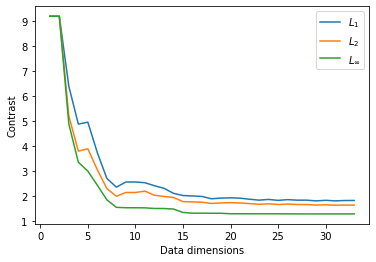

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(r_values, c1, label="$L_1$")
ax.plot(r_values, c2, label="$L_2$")
ax.plot(r_values, cinf, label="$L_\infty$")
ax.legend()
ax.set_xlabel("Data dimensions")
ax.set_ylabel("Contrast")
plt.show()

Comparing this to the plot in the text book we can see the same behavior:
- Hihger 'p' values means lower contrast
- Higher dimenstions means lower contrast

# Q6 from Chapter 3 of [Aggarwal](https://www.springer.com/gp/book/9783319141411)

For this task we will use the KDD Cup 1999 data from last week.

1. The data are available via github as [kddcup.arff](https://raw.githubusercontent.com/PaulHancock/COMP5009_pracs/main/data/kddcup99.arff), load them as a pandas data frame.
2. Remove the numeric attributes and keep only categorical attributes.
3. Remove all duplicate rows.
4. Randomly pick a data point (row) and compute it's similarity to all other rows uing:
  - Inverse Occurance Frequency Measure
  - Overlap Measure
5. Find the nearest neighbour for your randomly chosen data point.

## 1 Load the data
We did this exactly last week so just copy across

In [ ]:
import pandas as pd
from scipy.io import arff
import urllib
import urllib.request
import numpy as np

In [ ]:
data_url = 'https://raw.githubusercontent.com/PaulHancock/COMP5009_pracs/main/data/kddcup99.arff'
file_name = 'kddcup99.arff'
# this will download the file, look in your explorer to confirm
urllib.request.urlretrieve(data_url, file_name)

('kddcup99.arff', <http.client.HTTPMessage at 0x7fe5ee7702d0>)

In [ ]:
# load the data from arff format
data = arff.loadarff(file_name)
raw_df = pd.DataFrame(data[0]) # note the [0] here.

In [ ]:
raw_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf'
1,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf'
2,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf'
3,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf'
4,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,b'tcp',b'ldap',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,15.0,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,b'neptune'
9996,0.0,b'tcp',b'http',b'SF',309.0,397.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,b'normal'
9997,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf'
9998,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf'


## 2 Remove numeric attributes
Remove the numeric attributes and keep only categorical attributes.

In [ ]:
# Determine the data type for each coulmn
raw_df.dtypes

duration                       float64
protocol_type                   object
service                         object
flag                            object
src_bytes                      float64
dst_bytes                      float64
land                            object
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                       object
lnum_compromised               float64
lroot_shell                    float64
lsu_attempted                  float64
lnum_root                      float64
lnum_file_creations            float64
lnum_shells                    float64
lnum_access_files              float64
lnum_outbound_cmds             float64
is_host_login                   object
is_guest_login                  object
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate          

In [ ]:
# note that the string columns are of type object so select just those
df = raw_df.select_dtypes(include=object)
df

,protocol_type,service,flag,land,logged_in,is_host_login,is_guest_login,label
0,b'icmp',b'ecr_i',b'SF',b'0',b'0',b'0',b'0',b'smurf'
1,b'icmp',b'ecr_i',b'SF',b'0',b'0',b'0',b'0',b'smurf'
2,b'icmp',b'ecr_i',b'SF',b'0',b'0',b'0',b'0',b'smurf'
3,b'icmp',b'ecr_i',b'SF',b'0',b'0',b'0',b'0',b'smurf'
4,b'icmp',b'ecr_i',b'SF',b'0',b'0',b'0',b'0',b'smurf'
...,...,...,...,...,...,...,...,...
9995,b'tcp',b'ldap',b'S0',b'0',b'0',b'0',b'0',b'neptune'
9996,b'tcp',b'http',b'SF',b'0',b'1',b'0',b'0',b'normal'
9997,b'icmp',b'ecr_i',b'SF',b'0',b'0',b'0',b'0',b'smurf'
9998,b'icmp',b'ecr_i',b'SF',b'0',b'0',b'0',b'0',b'smurf'


## 3 Remove duplicates
Remove all duplicate rows.

In [ ]:
# no need for anything fancy, just use the drop_duplicates function
cleaned_df = df.drop_duplicates()

In [ ]:
# see how many rows remain
cleaned_df

,protocol_type,service,flag,land,logged_in,is_host_login,is_guest_login,label
0,b'icmp',b'ecr_i',b'SF',b'0',b'0',b'0',b'0',b'smurf'
5,b'tcp',b'smtp',b'SF',b'0',b'1',b'0',b'0',b'normal'
6,b'udp',b'domain_u',b'SF',b'0',b'0',b'0',b'0',b'normal'
9,b'tcp',b'private',b'S0',b'0',b'0',b'0',b'0',b'neptune'
19,b'tcp',b'ftp_data',b'SF',b'0',b'1',b'0',b'0',b'normal'
...,...,...,...,...,...,...,...,...
9507,b'tcp',b'netbios_dgm',b'S0',b'0',b'0',b'0',b'0',b'neptune'
9521,b'tcp',b'daytime',b'S0',b'0',b'0',b'0',b'0',b'neptune'
9586,b'tcp',b'sql_net',b'REJ',b'0',b'0',b'0',b'0',b'neptune'
9592,b'tcp',b'telnet',b'RSTO',b'0',b'0',b'0',b'0',b'normal'


In [ ]:
# notice that we have 119 rows, but the row indexes haven't been updated
# we can update them to avoid some confusion later
cleaned_df.reset_index(inplace=True, drop=True)
cleaned_df

,protocol_type,service,flag,land,logged_in,is_host_login,is_guest_login,label
0,b'icmp',b'ecr_i',b'SF',b'0',b'0',b'0',b'0',b'smurf'
1,b'tcp',b'smtp',b'SF',b'0',b'1',b'0',b'0',b'normal'
2,b'udp',b'domain_u',b'SF',b'0',b'0',b'0',b'0',b'normal'
3,b'tcp',b'private',b'S0',b'0',b'0',b'0',b'0',b'neptune'
4,b'tcp',b'ftp_data',b'SF',b'0',b'1',b'0',b'0',b'normal'
...,...,...,...,...,...,...,...,...
114,b'tcp',b'netbios_dgm',b'S0',b'0',b'0',b'0',b'0',b'neptune'
115,b'tcp',b'daytime',b'S0',b'0',b'0',b'0',b'0',b'neptune'
116,b'tcp',b'sql_net',b'REJ',b'0',b'0',b'0',b'0',b'neptune'
117,b'tcp',b'telnet',b'RSTO',b'0',b'0',b'0',b'0',b'normal'


## 4 Randomly pick a data point and compute ...
Randomly pick a data point (row) and compute it's similarity to all other rows uing:
  - Inverse Occurance Frequency Measure
  - Match Measure

Firstly we must choose a row at random.

In [ ]:
import random

In [ ]:
cleaned_df.shape[0]

119

In [ ]:
my_row_number = random.randint(0, # minimum value to choose
                               cleaned_df.shape[0]) # maximum value, should be the number of rows in our data frame
my_row = cleaned_df.iloc[my_row_number]

print(f"I chose instance {my_row_number}:")
print( "----------------------------")
print(my_row)

I chose instance 70:
----------------------------
protocol_type         b'tcp'
service              b'smtp'
flag                   b'S0'
land                    b'0'
logged_in               b'0'
is_host_login           b'0'
is_guest_login          b'0'
label             b'neptune'
Name: 70, dtype: object


### Inverse Occurance Frequency Meausre (IOFM)

For inverse occurance frequency measure we need to determine what the frequencies are for each value of each attribute.
The python builtin `set` type is useful here as it defines an unordered list of **unique** items.

In [ ]:
# use set to reduce all our values to a set of unique values
for attribute in cleaned_df.columns:
  print(f"Attribute {attribute} has values {set(cleaned_df[attribute])}")

Attribute protocol_type has values {b'tcp', b'icmp', b'udp'}
Attribute service has values {b'ftp', b'efs', b'domain_u', b'auth', b'supdup', b'uucp', b'nntp', b'sunrpc', b'time', b'vmnet', b'telnet', b'login', b'http_443', b'ssh', b'netbios_ns', b'imap4', b'netstat', b'private', b'whois', b'discard', b'http', b'ecr_i', b'Z39_50', b'hostnames', b'csnet_ns', b'smtp', b'kshell', b'courier', b'ldap', b'other', b'nnsp', b'ctf', b'daytime', b'iso_tsap', b'klogin', b'mtp', b'exec', b'sql_net', b'ntp_u', b'finger', b'name', b'ftp_data', b'uucp_path', b'rje', b'eco_i', b'echo', b'shell', b'systat', b'remote_job', b'X11', b'netbios_dgm', b'pop_2', b'link', b'pop_3', b'urp_i', b'domain', b'bgp', b'netbios_ssn', b'printer'}
Attribute flag has values {b'S2', b'S1', b'RSTR', b'S0', b'REJ', b'RSTO', b'OTH', b'SF'}
Attribute land has values {b'0'}
Attribute logged_in has values {b'1', b'0'}
Attribute is_host_login has values {b'0'}
Attribute is_guest_login has values {b'1', b'0'}
Attribute label has va

In [ ]:
# lets create a function which will create a lookup table of the pk values
def attribute_frequencies(dataframe):
  """
  Construct a dictionary px, such that the probability of attribute a, having value x, for the given data set is:
  pk[a][x]
  """
  pk = {} # pk will be a dictionary which we can index using the attribute name
  for attribute in dataframe.columns:
    column = dataframe[attribute]
    categories = set(column)
    frequencies = {}
    for c in categories:
      frequencies[c] = np.sum(column == c)/column.shape[0]
    pk[attribute] = frequencies
  return pk

In [ ]:
# test that the function works, hand looks to give sensible results
pk = attribute_frequencies(cleaned_df)

In the above we have a dictionary `pk` which contains another set of dictionaries.
This is how we construct our look up table.
Therefore we have a double indexing:
- `pk[attribute]` will select the lookup table for the given attribute. This is a map of `category -> frequency`
- `pk[attribute][category]` will then select the given category and return the frequency.
Finally, `first_row[attribute]` will extract the `category` corresponding to `attribute` from the first row.

In [ ]:
pk['service'][b'auth']

0.025210084033613446

Now we should create another functions with computes S defined as:

$ S(x,y) = 1/p_k(x_i)^2 $ if $x_i = y_i$ and zero otherwise.

In [ ]:
def iofm(first_row, second_row):
  """
  Compute the inverse occurance frequency measure (iofm) for two rows.
  """
  sim = 0
  # a pandas series (row) doesn't have columns or column names, but keys
  for attribute in first_row.keys():
    # we access the rows using these keys the same way we would columns of a dataframe
    if first_row[attribute] == second_row[attribute]:
      sim += 1/pk[attribute][first_row[attribute]]**2
  return sim

In [ ]:
# test that our similarity measure works
# each row should be very similar to itself!
iofm(my_row, my_row)

3553.818122445196

In [ ]:
best_row = None
best_similar = 0
# iterating over rows we have to use the .iterrows() function
# which returns both the row index, as well as the row
for index, row in cleaned_df.iterrows():
  if index != my_row_number: # don't allow my_row to be the best match!
    similar = iofm(row, my_row) # compute the similarity between this row and my_row
    if similar > best_similar:
      best_row = row # update the best_row to be the current row
      best_similar = similar # update the best_similar to be the just calculated similarity

print(f"My row is {my_row_number}")
print(f"Using Inverse Occurance Frequency Measure the nearest neighbour for my row is:\n{best_row}\nwith similarity score of {similar}")

0
1
My row is 70
Using Inverse Occurance Frequency Measure the nearest neighbour for my row is:
protocol_type        b'tcp'
service             b'smtp'
flag                  b'SF'
land                   b'0'
logged_in              b'1'
is_host_login          b'0'
is_guest_login         b'0'
label             b'normal'
Name: 1, dtype: object
with similarity score of 4.27135682271614


### Overlap Measure



This is the same as the IOFM but simplified to

$ S(x,y) = 1$ if $x_i = y_i$ and zero otherwise.

In [ ]:
def overlap(first_row, second_row):
  """
  Compute the overlap measure for two rows.
  """
  sim = 0
  # a pandas series (row) doesn't have columns or column names, but keys
  for attribute in first_row.keys():
    # we access the rows using these keys the same way we would columns of a dataframe
    if first_row[attribute] == second_row[attribute]:
      sim += 1
  return sim

In [ ]:
# test that our similarity measure works
# each row should be very similar to itself!
overlap(my_row, my_row)

8

In [ ]:
best_row = None
best_similar = 0
# iterating over rows we have to use the .iterrows() function
# which returns both the row index, as well as the row
for index, row in cleaned_df.iterrows():
  if index != my_row_number: # don't allow my_row to be the best match!
    similar = overlap(row, my_row)
    if similar > best_similar:
      best_similar = similar
      best_row = row
print(f"Using Overlap Measure the nearest neighbour for my row is:\n{best_row}\nwith similarity score of {similar}")

Using Overlap Measure the nearest neighbour for my row is:
protocol_type         b'tcp'
service           b'private'
flag                   b'S0'
land                    b'0'
logged_in               b'0'
is_host_login           b'0'
is_guest_login          b'0'
label             b'neptune'
Name: 3, dtype: object
with similarity score of 4


## 5 Find the nearest neighbour

Do your two nearest neighbour calculations agree?

Do you exepect that your nerest neighbour is unique or just one among many?

Depending on your chosen random datapoint you may have different answers for part 1, however for part 2 our algorithm didn't record multiple matches for the largest similarity so we don't know if it's unique. For the overlap measure, given that the possible similarity scores are 1 to 8, I would think that there is some likelyhood that there may be multiple neighbours at a similarity of 4 that are equally good matches.